# Analise de Dados da Indústria Cafeeira


#  1️⃣ importando e explorando o dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('cafe.csv', index_col=0)

In [ ]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,NaN,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
df.shape

(1395, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 1394
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1395 non-null   object 
 1   datetime     1395 non-null   object 
 2   cash_type    1395 non-null   object 
 3   card         1306 non-null   object 
 4   money        1325 non-null   float64
 5   coffee_name  1395 non-null   object 
dtypes: float64(1), object(5)
memory usage: 108.6+ KB


###variáveis `qualitativas nominais`


In [ ]:
df[['cash_type', 'coffee_name','card']]

,cash_type,coffee_name,card
0,card,Latte,ANON-0000-0000-0001
1,card,Hot Chocolate,ANON-0000-0000-0002
2,card,Hot Chocolate,ANON-0000-0000-0002
3,card,Americano,ANON-0000-0000-0003
4,card,Latte,ANON-0000-0000-0004
...,...,...,...
1390,card,Latte,ANON-0000-0000-0375
1391,card,Americano with Milk,ANON-0000-0000-0551
1392,card,Cappuccino,ANON-0000-0000-0551
1393,card,Americano,ANON-0000-0000-0375


### variáveis `qualitativas ordinais`

In [ ]:
df[['datetime','date', 'money']]

,datetime,money
0,2024-03-01 10:15:50.520,38.70
1,2024-03-01 12:19:22.539,38.70
2,2024-03-01 12:20:18.089,NaN
3,2024-03-01 13:46:33.006,28.90
4,2024-03-01 13:48:14.626,38.70
...,...,...
1390,2024-08-27 10:04:04.563,32.82
1391,2024-08-28 12:08:18.772,27.92
1392,2024-08-28 12:10:04.139,32.82
1393,2024-08-28 12:35:06.944,23.02


###variáveis `quantitativas discretas`

In [ ]:
#pode-se considerar o index



### variáveis `quantitativas contínuas`

In [ ]:
df[['datetime', 'money']]

,datetime,money
0,2024-03-01 10:15:50.520,38.70
1,2024-03-01 12:19:22.539,38.70
2,2024-03-01 12:20:18.089,NaN
3,2024-03-01 13:46:33.006,28.90
4,2024-03-01 13:48:14.626,38.70
...,...,...
1390,2024-08-27 10:04:04.563,32.82
1391,2024-08-28 12:08:18.772,27.92
1392,2024-08-28 12:10:04.139,32.82
1393,2024-08-28 12:35:06.944,23.02


# 3️⃣ - manipulando os dados

### Converta a coluna `datetime` de `object` para o tipo `datetime`

In [ ]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')
df['datetime'].dtype

dtype('<M8[ns]')

In [ ]:
df['cash_type']

,cash_type
0,card
1,card
2,card
3,card
4,card
...,...
1390,card
1391,card
1392,card
1393,card


### Corrigindo erros do DataFrame

In [ ]:
df_limpo = df.fillna({'money': 0, 'outros_campos': 'NaN'})


### Extraindo `time`, `date`, `month`, `week` da coluna datetime e criando novas colunas com essas informações

In [ ]:
df_limpo['time'] = df_limpo['datetime'].dt.time
df_limpo['date_only'] = df_limpo['datetime'].dt.date
df_limpo['month'] = df_limpo['datetime'].dt.month
df_limpo['week'] = df_limpo['datetime'].dt.isocalendar().week
print(df_limpo[['time', 'date_only', 'month', 'week']].head())

              time   date_only  month  week
0  10:15:50.520000  2024-03-01      3     9
1  12:19:22.539000  2024-03-01      3     9
2  12:20:18.089000  2024-03-01      3     9
3  13:46:33.006000  2024-03-01      3     9
4  13:48:14.626000  2024-03-01      3     9


# 4️⃣ - análisando e explorando os dados

### identificando o método de pagamento mais escolhido pelos clientes

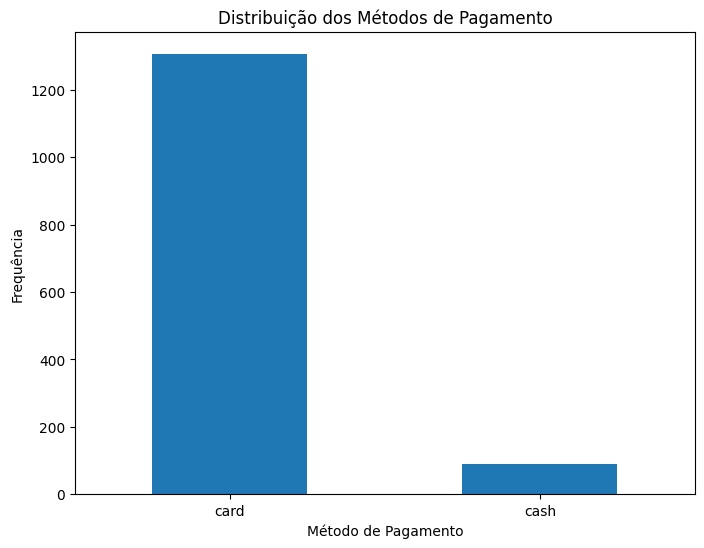

In [ ]:
cash_type_conta = df_limpo['cash_type'].value_counts()

plt.figure(figsize=(8, 6))
cash_type_conta.plot(kind='bar')
plt.title('Distribuição dos Métodos de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

### Descrevendo a distribuição dos tipos de pagamento escolhidos pelos clientes

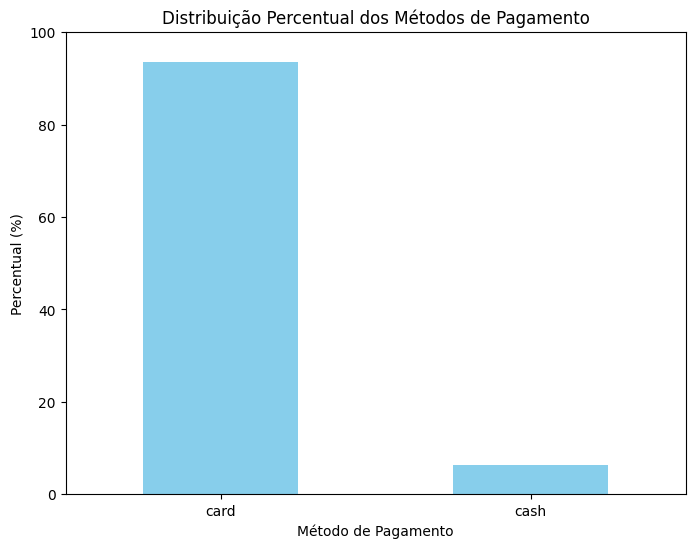

In [ ]:

distribuição_pagamento = df_limpo['cash_type'].value_counts(normalize=True) * 100

distribuição_pagamento_desc = distribuição_pagamento.describe()
distribuição_pagamento, distribuição_pagamento_desc

plt.figure(figsize=(8, 6))
distribuição_pagamento.plot(kind='bar', color='skyblue')
plt.title('Distribuição Percentual dos Métodos de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()


### Usando a coluna `month` criada para determinar qual mês gerou mais lucro

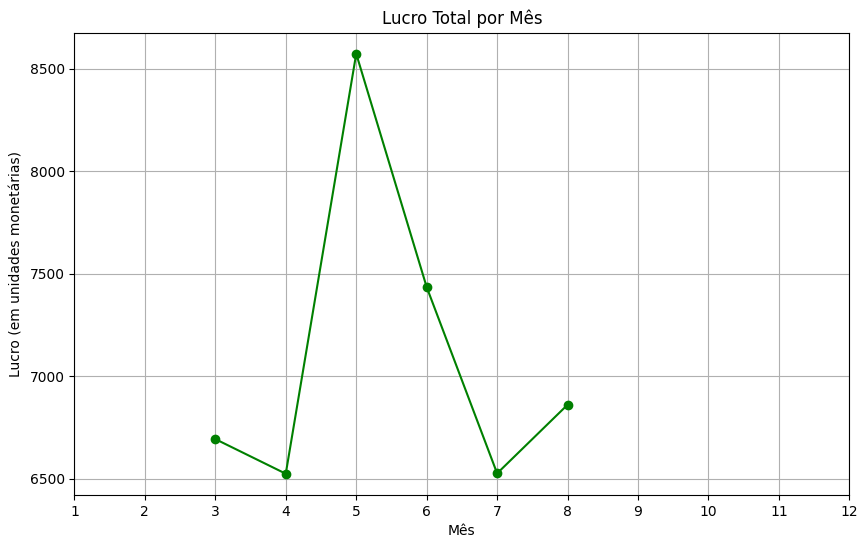

In [ ]:
monthly_revenue = df_limpo.groupby('month')['money'].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Lucro Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro (em unidades monetárias)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

### Determinando qual café é o mais comprado pelos clientes

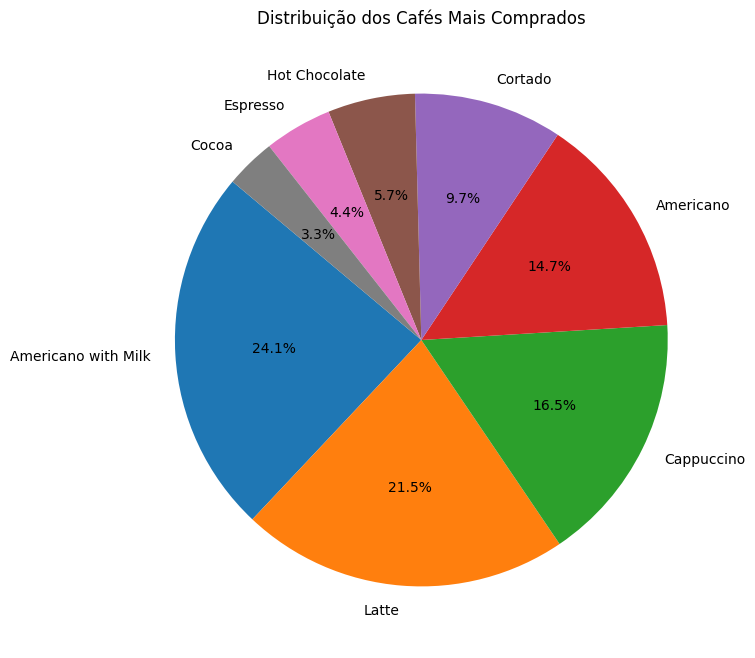

In [ ]:
coffee_counts = df_limpo['coffee_name'].value_counts()


plt.figure(figsize=(10, 8))
coffee_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Cafés Mais Comprados')
plt.ylabel('')
plt.show()

# 5️⃣tratando dados

### Verificando a necessidade de limpeza ou conversão na coluna `money`

In [ ]:
df_limpo['money'].info()


<class 'pandas.core.series.Series'>
Index: 1395 entries, 0 to 1394
Series name: money
Non-Null Count  Dtype  
--------------  -----  
1395 non-null   float64
dtypes: float64(1)
memory usage: 54.1 KB


In [ ]:
valor_maximo = df_limpo['money'].max()
valor_minimo = df_limpo['money'].min()
print(valor_maximo, valor_minimo)

40.0 0.0


### Substituindo os valores faltantes considerando o tipo de café (imagina-se que a média de um tipo, é diferente da média de outro tipo, por exemplo)

In [ ]:
df_limpo['money'] = df_limpo.groupby('coffee_name')['money'].transform(lambda x: x.fillna(x.mean()))
print(df_limpo['money'].isnull().sum())

0


### Verificando se houve mudança no lucro total gerado por cada tipo de café

In [ ]:
original = df.groupby('coffee_name')['money'].sum()
atualizado = df_limpo.groupby('coffee_name')['money'].sum()
mudanca = atualizado - original
mudanca

,money
coffee_name,
Americano,0.0
Americano with Milk,0.0
Cappuccino,0.0
Cocoa,0.0
Cortado,0.0
Espresso,0.0
Hot Chocolate,0.0
Latte,0.0


# 6️⃣ - gerando insights

### Visualizando a distribuição dos valores de vendas

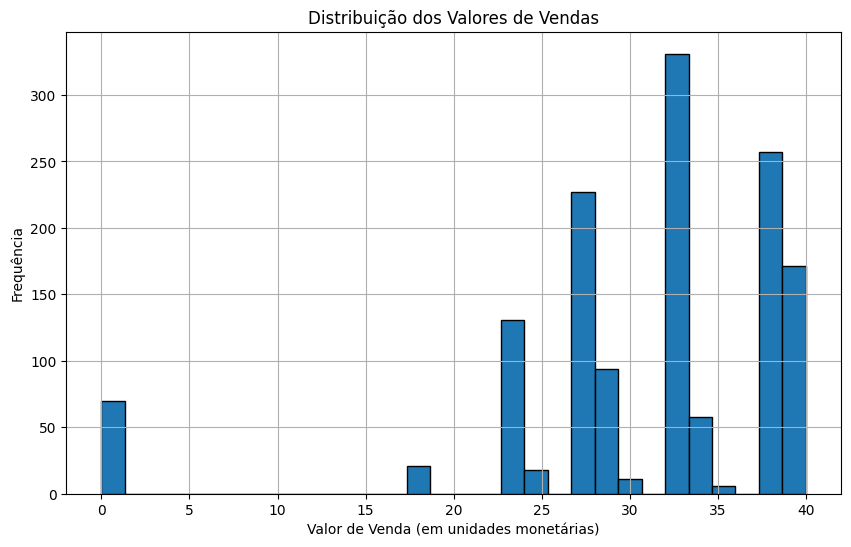

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_limpo['money'], bins=30, edgecolor='black')
plt.title('Distribuição dos Valores de Vendas')
plt.xlabel('Valor de Venda (em unidades monetárias)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

=> Verifica-se que as vendas nas faixas de 30 a 40 unidades monetárias (por exemplo Dólares ou Reais) são as masi escolhidas por clientes. Por ser as faixas de maior valores, abre-se, provavelmente, lastro para uma margem de lucro maior. Deve-se focalizar a produção  nesta faixa de peço, devido à aceitação dos clientes.

### Verificando se há sazonalidade nos dados

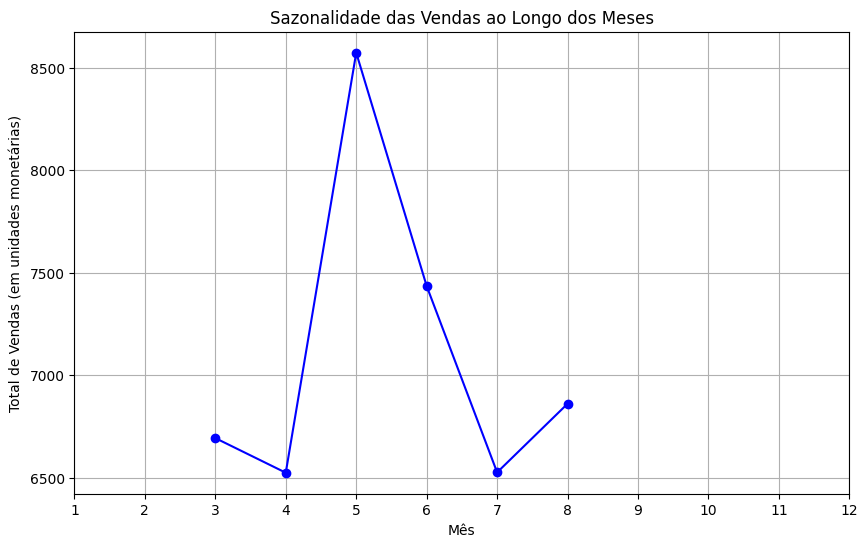

In [ ]:
vendas_mensais = df_limpo.groupby('month')['money'].sum()

# Plotando a sazonalidade das vendas ao longo dos meses
plt.figure(figsize=(10, 6))
vendas_mensais.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Sazonalidade das Vendas ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (em unidades monetárias)')
plt.grid(True)
plt.xticks(range(1, 13))  # Garantindo que todos os meses sejam exibidos no eixo x
plt.show()

### A sazonalidade decorre principalmente devido ao tipo de indústria (Cafeeira).Deve-se, devido à alta concentração de vendas apenas nos meses de abril, maior junho e julho (principalmente maio e junho), distribuir, ou tentar maximizar as vendas no período de plantação do café, buscando maximizar as vendas e a margem de lucro da empresa.

### Realize a análise dos quartis, mediana e outliers

In [ ]:
# Análise dos quartis, mediana e outliers para a coluna 'money'
quartiles = df_limpo['money'].quantile([0.25, 0.5, 0.75])
median = df_limpo['money'].median()

# Calculando os limites para detecção de outliers usando a regra do IQR (Interquartile Range)
iqr = quartiles[0.75] - quartiles[0.25]
lower_bound = quartiles[0.25] - 1.5 * iqr
upper_bound = quartiles[0.75] + 1.5 * iqr

# Identificando outliers
outliers = df_limpo[(df_limpo['money'] < lower_bound) | (df_limpo['money'] > upper_bound)]

quartiles, median, lower_bound, upper_bound, outliers.shape[0]


(0.25    27.92
 0.50    32.82
 0.75    37.72
 Name: money, dtype: float64,
 32.82,
 13.220000000000006,
 52.419999999999995,
 70)

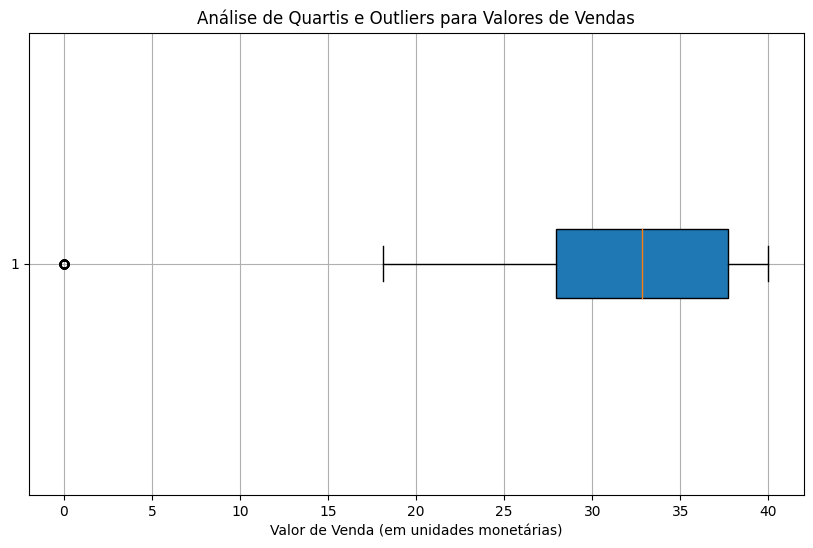

In [ ]:

plt.figure(figsize=(10, 6))
plt.boxplot(df_limpo['money'], vert=False, patch_artist=True)
plt.title('Análise de Quartis e Outliers para Valores de Vendas')
plt.xlabel('Valor de Venda (em unidades monetárias)')
plt.grid(True)
plt.show()


### Observa-se que a mediana segue entre 30 e 35 unidades monetárias, isso comprova, excluindo-se os outliers, que a faixa de venda e a proporção de ocasioões de venda permanesse entre 30 e 35. Isso demonstra que, sim, dentre o número de vendas, há uma boa adesão de clientes ao preço, de maneira que, se o numero de vendas estiver sustentando e gerando lucro ao negócio, deve-se manter o valor.

### Realizando a análise da dispersão dos dados

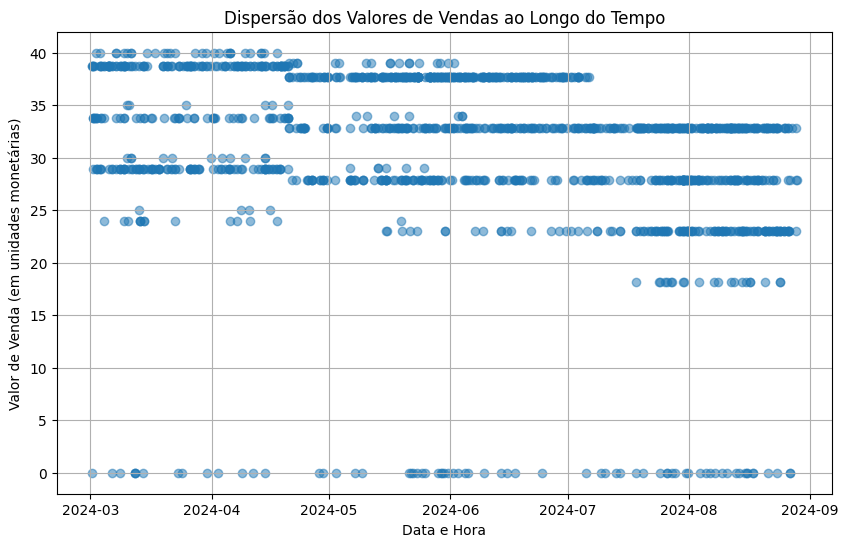

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['datetime'], df_limpo['money'], alpha=0.5)
plt.title('Dispersão dos Valores de Vendas ao Longo do Tempo')
plt.xlabel('Data e Hora')
plt.ylabel('Valor de Venda (em unidades monetárias)')
plt.grid(True)
plt.show()

### Realizando a análise do desvio padrão dos dados

In [ ]:
std_dev = df_limpo['money'].std()

std_dev

8.733449297785796

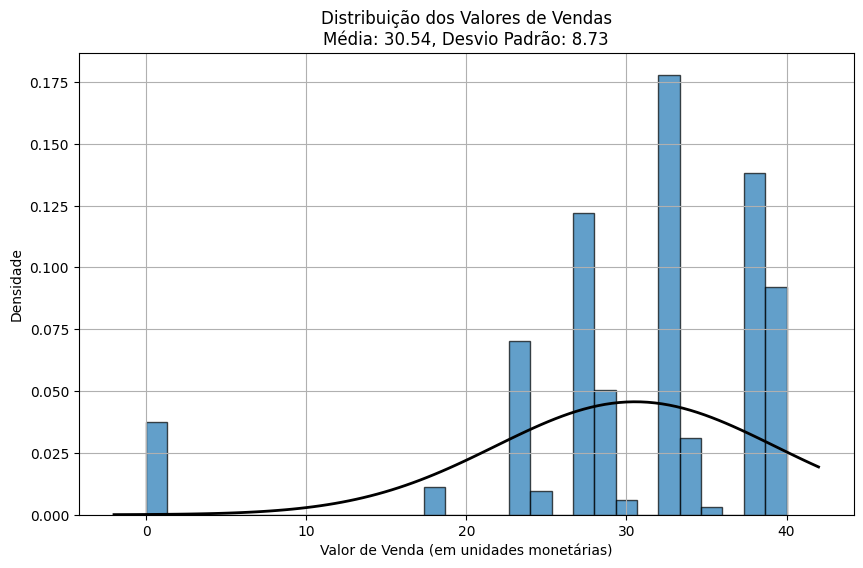

In [ ]:
mean = df_limpo['money'].mean()
std_dev = df_limpo['money'].std()
plt.figure(figsize=(10, 6))
plt.hist(df_limpo['money'], bins=30, edgecolor='black', alpha=0.7, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5*((x - mean)/std_dev)**2) / (std_dev * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
title = f'Distribuição dos Valores de Vendas\nMédia: {mean:.2f}, Desvio Padrão: {std_dev:.2f}'
plt.title(title)
plt.xlabel('Valor de Venda (em unidades monetárias)')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()
